Installing (updating) the following libraries for your Sagemaker
instance.

In [ ]:
!pip install -U mxnet-cu101==1.7.0
!pip install ..  # installing d2l


# Implementation of Multilayer Perceptrons from Scratch
:label:`sec_mlp_scratch`

Now that we have characterized
multilayer perceptrons (MLPs) mathematically,
let us try to implement one ourselves. To compare against our previous results
achieved with softmax regression
(:numref:`sec_softmax_scratch`),
we will continue to work with
the Fashion-MNIST image classification dataset
(:numref:`sec_fashion_mnist`).


In [1]:
from d2l import mxnet as d2l
from mxnet import gluon, np, npx
npx.set_np()

In [2]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

## Initializing Model Parameters

Recall that Fashion-MNIST contains 10 classes,
and that each image consists of a $28 \times 28 = 784$
grid of grayscale pixel values.
Again, we will disregard the spatial structure
among the pixels for now,
so we can think of this as simply a classification dataset
with 784 input features and 10 classes.
To begin, we will implement an MLP
with one hidden layer and 256 hidden units.
Note that we can regard both of these quantities
as hyperparameters.
Typically, we choose layer widths in powers of 2,
which tend to be computationally efficient because
of how memory is allocated and addressed in hardware.

Again, we will represent our parameters with several tensors.
Note that *for every layer*, we must keep track of
one weight matrix and one bias vector.
As always, we allocate memory
for the gradients of the loss with respect to these parameters.


In [3]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = np.random.normal(scale=0.01, size=(num_inputs, num_hiddens))
b1 = np.zeros(num_hiddens)
W2 = np.random.normal(scale=0.01, size=(num_hiddens, num_outputs))
b2 = np.zeros(num_outputs)
params = [W1, b1, W2, b2]

for param in params:
    param.attach_grad()

## Activation Function

To make sure we know how everything works,
we will implement the ReLU activation ourselves
using the maximum function rather than
invoking the built-in `relu` function directly.


In [4]:
def relu(X):
    return np.maximum(X, 0)

## Model

Because we are disregarding spatial structure,
we `reshape` each two-dimensional image into
a flat vector of length  `num_inputs`.
Finally, we implement our model
with just a few lines of code.


In [5]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(np.dot(X, W1) + b1)
    return np.dot(H, W2) + b2

## Loss Function

To ensure numerical stability,
and because we already implemented
the softmax function from scratch
(:numref:`sec_softmax_scratch`),
we leverage the integrated function from high-level APIs
for calculating the softmax and cross-entropy loss.
Recall our earlier discussion of these intricacies
in :numref:`subsec_softmax-implementation-revisited`.
We encourage the interested reader
to examine the source code for the loss function
to deepen their knowledge of implementation details.


In [6]:
loss = gluon.loss.SoftmaxCrossEntropyLoss()

## Training

Fortunately, the training loop for MLPs
is exactly the same as for softmax regression.
Leveraging the `d2l` package again,
we call the `train_ch3` function
(see :numref:`sec_softmax_scratch`),
setting the number of epochs to 10
and the learning rate to 0.1.


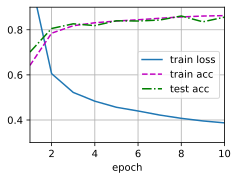

In [7]:
num_epochs, lr = 10, 0.1
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs,
              lambda batch_size: d2l.sgd(params, lr, batch_size))

To evaluate the learned model,
we apply it on some test data.


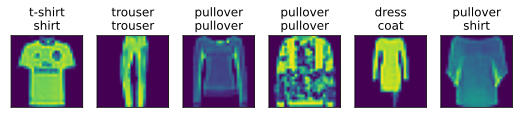

In [8]:
d2l.predict_ch3(net, test_iter)

## Summary

* We saw that implementing a simple MLP is easy, even when done manually.
* However, with a large number of layers, implementing MLPs from scratch can still get messy (e.g., naming and keeping track of our model's parameters).


## Exercises

1. Change the value of the hyperparameter `num_hiddens` and see how this hyperparameter influences your results. Determine the best value of this hyperparameter, keeping all others constant.
1. Try adding an additional hidden layer to see how it affects the results.
1. How does changing the learning rate alter your results? Fixing the model architecture and other hyperparameters (including number of epochs), what learning rate gives you the best results?
1. What is the best result you can get by optimizing over all the hyperparameters (learning rate, number of epochs, number of hidden layers, number of hidden units per layer) jointly?
1. Describe why it is much more challenging to deal with multiple hyperparameters.
1. What is the smartest strategy you can think of for structuring a search over multiple hyperparameters?


[Discussions](https://discuss.d2l.ai/t/92)
